# Final Project - r/Place
### By Tyler Depa

r/Place is a dedicated subreddit on Reddit with a blank canvas made up of tiny white pixel grids. On the blank canvas, Reddit users can place colored pixels once every five minutes, letting many different communities form a giant piece of art. It originally took place for a couple days on April Fools, 2017. It was extremely popular, so Reddit re-opened it for 4 days on April Fools, 2022. This dataset contains the data for the 2022 experiment, with columns containing every single pixel placed, with the timestamp, hashed user, color of the pixel, and the coordinate of the pixel placed, from 0, 0 to 2000, 2000. The image below is the final canvas before the experiment ended.

- Lasted 83 hours
- New colors were added every day
- Canvas expanded to 2000 x 1000 around 16:25 GMT on April 2
- Canvas expanded to 2000 x 2000 around 19:00 GMT on April 3
- On the last day, users were forced to only place white pixels signalling the end

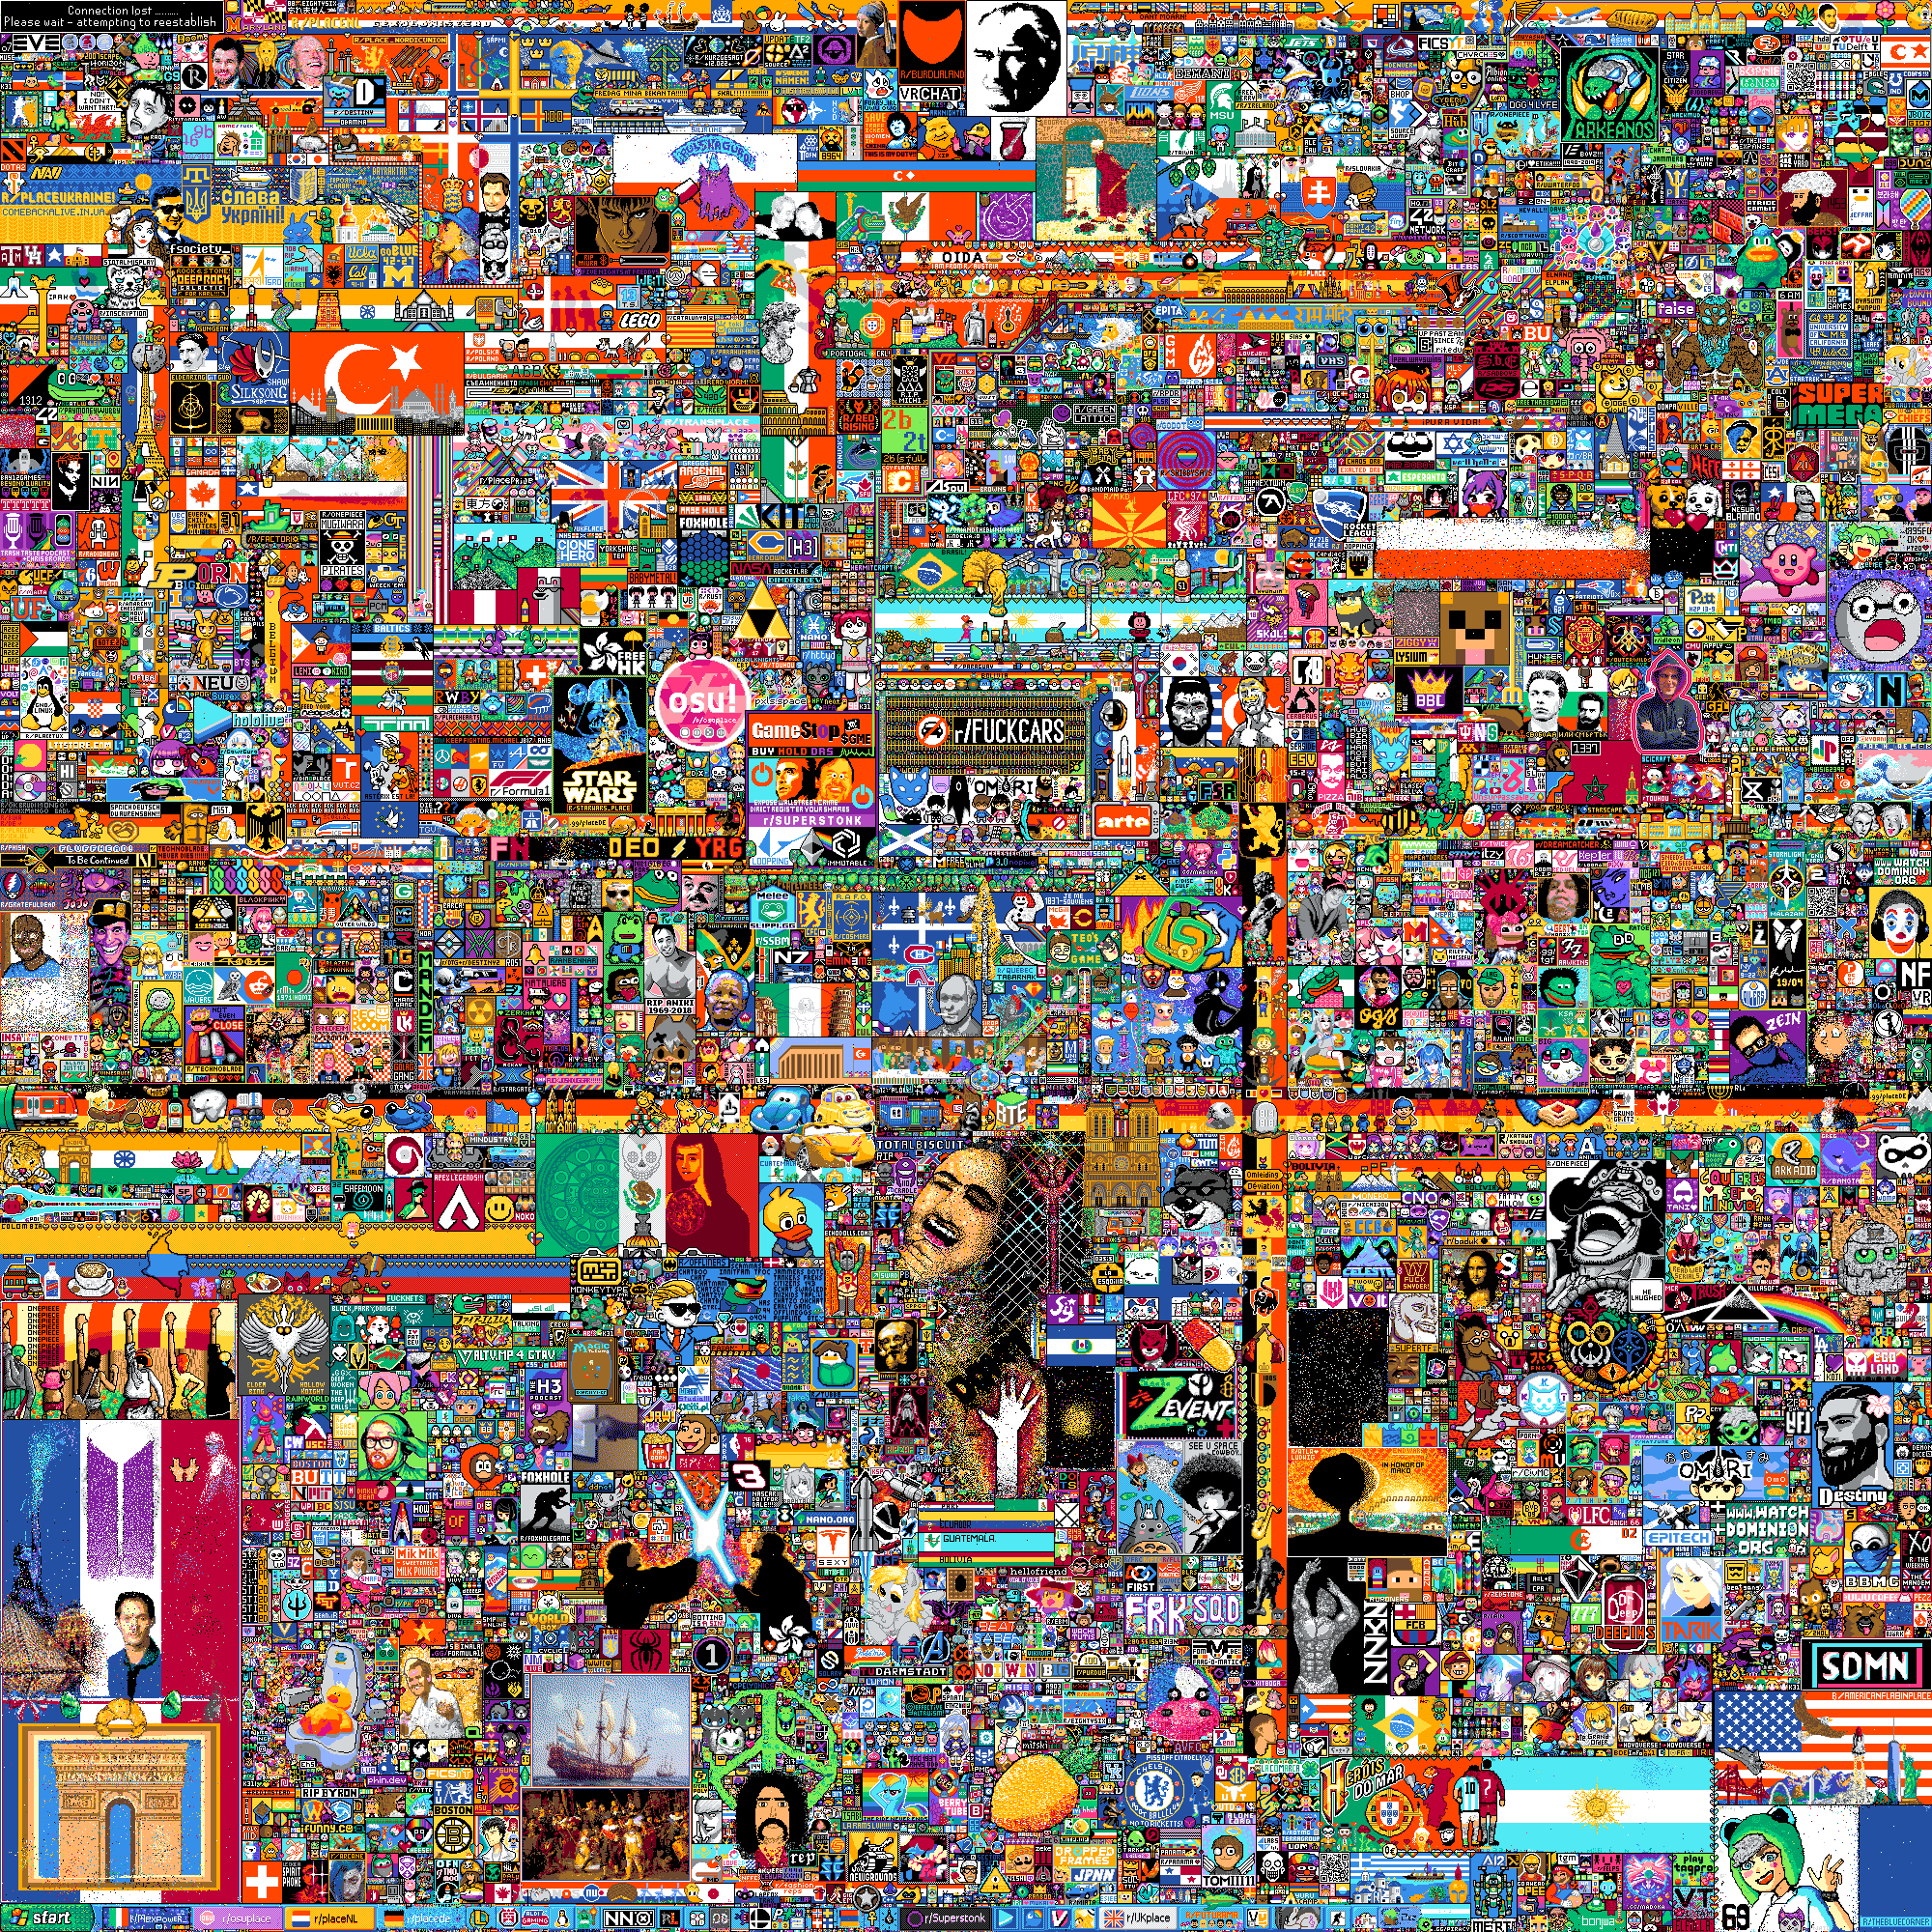

Due to the sheer size of the data (over 20gb) and limitations on processing power (ram), I was only able to use a small chunk of data. All of the dataframes are stored in the ram for usage, and my computer has 16gb of ram. When doing conversions on the dataframe, a copy has to be made first, so the original dataframe could not be above 6-8gb. A large majority of this project was spent figuring out how to convert the different columns, and how to import the data efficiently.

In [13]:
import datetime
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc
import pyarrow
# different libraries to import
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
df = pd.DataFrame([])
for i in range(4):
    # loops through the first 5 sub-datasets
    cmd1 = 'pd.read_csv(\'./data/Q.csv\', sep=\',\', dtype={\'timestamp\':str,\'user_id\':\'string[pyarrow]\',\'pixel_color\':\'string[pyarrow]\',\'coordinate\':\'string[pyarrow]\'})'
    # When importing, I set the datatypes to a pyarrow string instead of a normal string to reduce memory usage to almost 1/3
    cmd1 = cmd1.replace('Q', str(i))
    exec(f'df{i} = {cmd1}')
    print(f'Loaded in dataset {i}')
    exec(f'df = pd.concat([df, df{i}], ignore_index=True, axis=0, sort=False)')
    exec(f'del df{i}')
    # throughout the notebook, I have to delete temporary dataframes to save as much memory as possible
    gc.collect()
# df = df[::5000] # used for testing
df # shows dataset

Loaded in dataset 0
Loaded in dataset 1
Loaded in dataset 2
Loaded in dataset 3


,timestamp,user_id,pixel_color,coordinate
0,2022-04-04 00:53:51.577 UTC,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...,#00CCC0,"826,1048"
1,2022-04-04 00:53:53.758 UTC,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...,#94B3FF,"583,1031"
2,2022-04-04 00:53:54.685 UTC,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...,#6A5CFF,"1873,558"
3,2022-04-04 00:54:57.541 UTC,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...,#009EAA,"1627,255"
4,2022-04-04 00:55:16.307 UTC,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...,#94B3FF,"49,1478"
...,...,...,...,...
6237037,2022-04-03 23:16:18.457 UTC,wZfy+FNxyQvN2ClgZv6L+75wGx52D0aumrnE4xu5cHl1c3...,#FFFFFF,"176,1624"
6237038,2022-04-03 23:13:39.166 UTC,EcAzojinyQ1DVtbM8q5o+8oLEStyMAlzwiytjq6/oGtPpd...,#FFFFFF,"170,1076"
6237039,2022-04-03 23:18:30.191 UTC,BXNygnX1/l+ayzaIZMrICnL26H7f/tkyb1nknOK7muEAJp...,#FFFFFF,"235,174"
6237040,2022-04-03 23:12:07.164 UTC,VyrIcugSCReBh/7GBKB2Hpi205y+uPJcm7NHe5Uk15+DhV...,#FFFFFF,"1282,1360"


In [14]:
# converts time to unix time - seconds since January 1st, 1970
format = "%Y-%m-%d %H:%M:%S"
def time_conversion(row):
    # This function converts from datetime to unix time and subtracts starting time of the experiment
    row = row[:row.find(':')+6]
    date_time = datetime.datetime.strptime(row, format)
    return (time.mktime(date_time.timetuple()) - 1648832400)

dftemp = df["timestamp"].apply(lambda x: time_conversion(x)) # temporary dataframe to store unix values
dftemp = pd.DataFrame(list(dftemp))
df = pd.concat([df, dftemp], axis=1, ignore_index=True) # merges the temporary dataframe with the main dataframe
df = df.drop([0], axis=1)
df = df.set_axis(['user', 'color', 'coordinate', 'time'], axis=1, inplace=False) # renames columns
del dftemp
gc.collect()
df.head(5)

,user,color,coordinate,time
0,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...,#00CCC0,"826,1048",215631.0
1,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...,#94B3FF,"583,1031",215633.0
2,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...,#6A5CFF,"1873,558",215634.0
3,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...,#009EAA,"1627,255",215697.0
4,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...,#94B3FF,"49,1478",215716.0


In [15]:
# fixes coordinates
def split_coords(row):
    # converts a coordinate (34, 21) into two integers, 34 and 21
    x = row[:row.find(',')]
    y = row[row.find(',')+1:]
    if y != y[:row.find(',')+2]:
        y = y[:row.find(',')]
    return {'x' : int(x), 'y' : int(y)}

dftemp = df["coordinate"].apply(lambda x: split_coords(x)) # temporary dataframe to store x and y values
dftemp = pd.DataFrame(list(dftemp))
df = pd.concat([df, dftemp], axis=1, ignore_index=True) # merges the temporary dataframe with the main dataframe
df = df.drop([2], axis=1)
df = df.set_axis(['user', 'color', 'time', 'x', 'y'], axis=1, inplace=False) # renames columns
del dftemp
gc.collect()
df.head(5)

,user,color,time,x,y
0,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...,#00CCC0,215631.0,826,1048
1,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...,#94B3FF,215633.0,583,1031
2,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...,#6A5CFF,215634.0,1873,558
3,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...,#009EAA,215697.0,1627,255
4,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...,#94B3FF,215716.0,49,1478


In [4]:
# Creates a dataframe to sort which times had the most pixels placed
dfTime = df[['time', 'color']].groupby('time').count()
dfTime.reset_index(inplace=True)
dfTime = dfTime.set_axis(['time', 'count'], axis=1, inplace=False) # renames columns
dfTime = dfTime.sort_values(by='count', ascending=False) # sorts by count highest to lowest
dfTime.drop(dfTime.tail(1).index,inplace=True)
dfTime.head(5)

,time,count
723,209465.0,2379
724,209466.0,2143
722,209464.0,2037
725,209467.0,2032
728,209470.0,2020


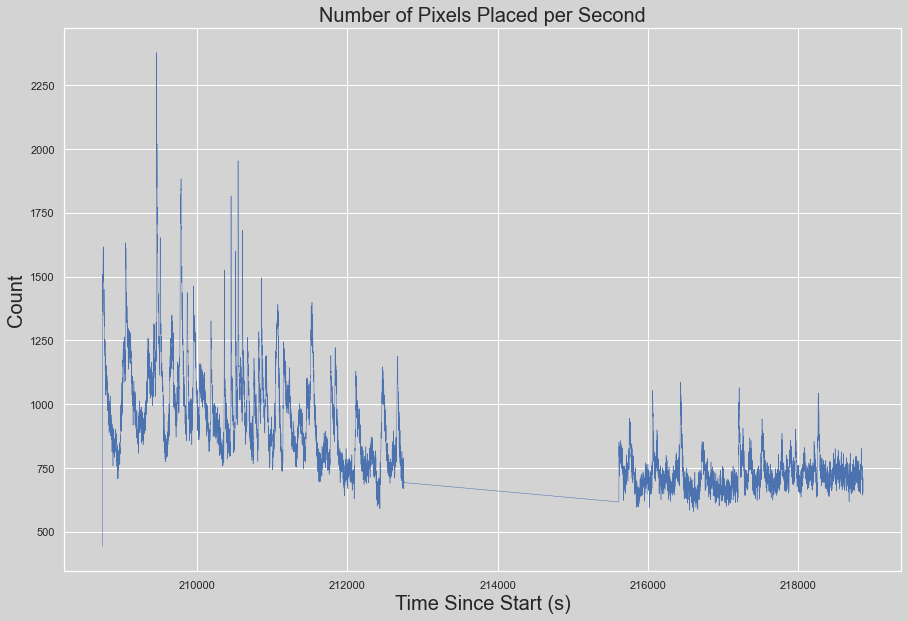

In [5]:
plt.style.use('seaborn-dark')
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
timeGraph = sns.lineplot(data=dfTime, x='time', y='count', ci=1, ax=ax, linewidth=0.5)
plt.title('Number of Pixels Placed per Second', fontsize=20)
plt.xlabel('Time Since Start (s)', fontsize=20)
plt.ylabel('Count', fontsize=20)
del dfTime
gc.collect()
plt.show()

This line graph shows how many pixels were placed every second. As seen, there are obvious spikes. These are most likely caused by streamers or communities attempting to place a large amount of pixels at one time to claim/defend their spot. The gap in the middle is caused by the chunk of data being seperated in time.

In [6]:
dfColors = df[['color','user']].groupby('color').count() # dataframe with each color and its count
dfColors.reset_index(inplace=True)
dfColors = dfColors.set_axis(['color', 'count'], axis=1, inplace=False) # renames columns
dfColors = dfColors.sort_values(by='count', ascending=False) # sorts by count highest to lowest
dfColors.head(5)

,color,count
0,#000000,1405818
31,#FFFFFF,1041600
6,#2450A4,460580
20,#BE0039,402055
27,#FFA800,389683


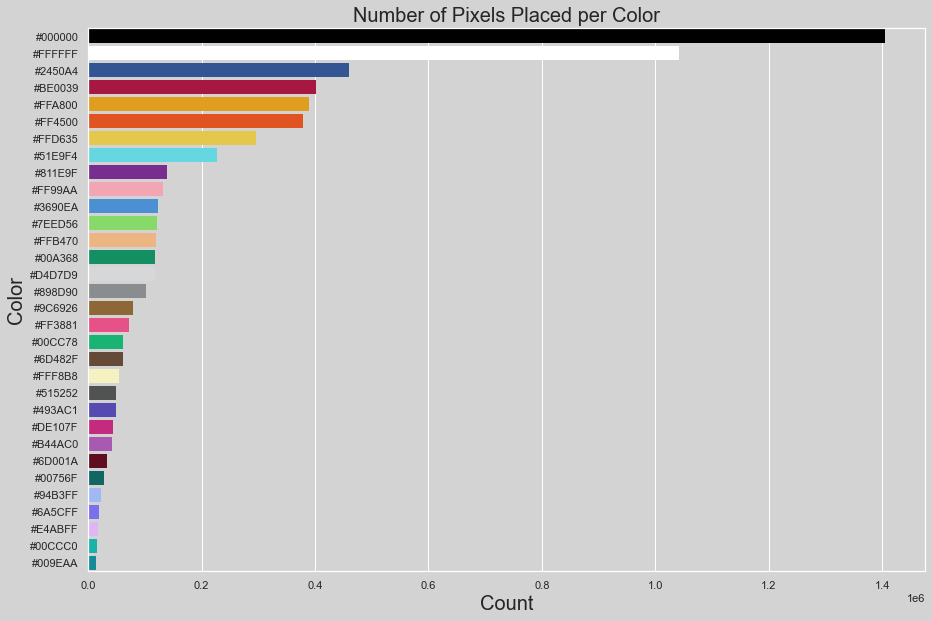

In [7]:
countList = dfColors['count'].tolist() # converts the colors column to a list
clrs = ['grey' if (x < max(countList)) else 'red' for x in countList]
for i in range(len(clrs)):
    clrs[i] = dfColors['color'].iloc[i] # sets each bar color to its respective hex value
plt.style.use('seaborn-dark')
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
colorsGraph = sns.barplot(data=dfColors, x='count', y='color', ci=0.9, ax=ax, palette=clrs, edgecolor='black', linewidth=0)
plt.title('Number of Pixels Placed per Color', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Color', fontsize=20)
del dfColors
gc.collect()
plt.show()

This bar graph reveals how often each color was placed. The color of each bar represents the exact color used in the experiment. The neutral colors, such as black and white, are the most placed with the primary colors next. This makes sense as designs often have either whitespace or black outlines. Since eight new colors were introduced every day, the colors that existed since the beginning were used much more. If the full dataset were shown, there might be much more white because of the "whiteout" that occured at the end of the experiment.

In [8]:
# Makes a new dataframe showing how many users placed x number of pixels.
dfUsers = df[['user','color']].groupby('user').count() # dataframe with each user and their # of pixels placed
dfUsers.reset_index(inplace=True)
dfUsers = dfUsers.set_axis(['user', 'count'], axis=1, inplace=False) # renames columns
dfUsers = dfUsers.groupby('count').count() # adds up how many users have placed some number of pixels
dfUsers.reset_index(inplace=True)
dfUsers = dfUsers.sort_values(by='count', ascending=False) # sorts by count highest to lowest
dfUsers = dfUsers.set_axis(['placed', 'count'], axis=1, inplace=False) # renames columns
dfUsers.head(5)

,placed,count
31,34,1
30,31,1
29,30,1
28,29,3
27,28,2


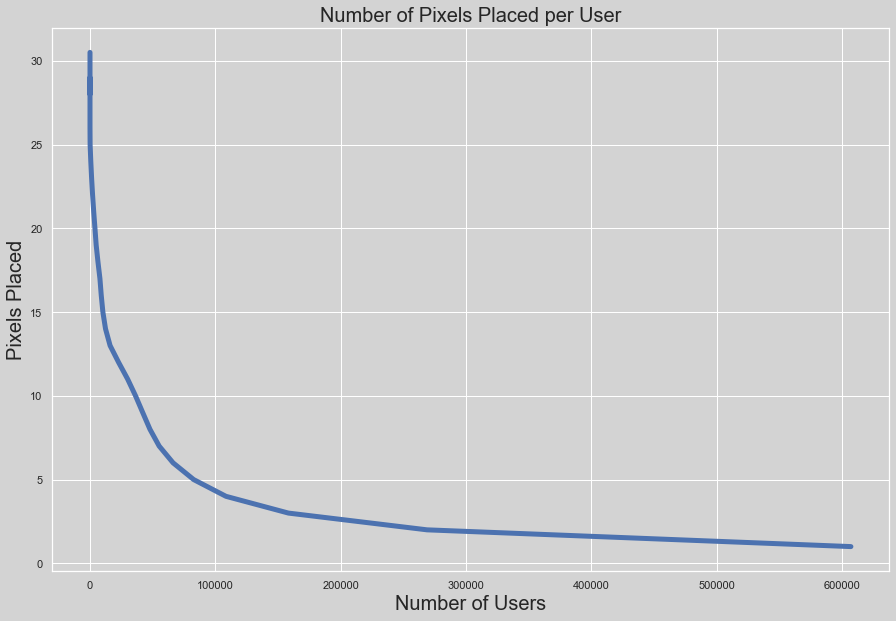

In [9]:
plt.style.use('seaborn-dark')
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'}) # sets background colors
fig, ax = plt.subplots(figsize=(15, 10))
usersGraph = sns.lineplot(data=dfUsers, x='count', y='placed', ci=0.9, ax=ax, linewidth = 5)
plt.title('Number of Pixels Placed per User', fontsize=20)
plt.xlabel('Number of Users', fontsize=20)
plt.ylabel('Pixels Placed', fontsize=20)
del dfUsers
gc.collect()
plt.show()

This line plot shows the number of users who placed y number of pixels. It reveals that there is an almost inverse relationship. There were a very small amount of users who placed an insane number of pixels, and the large majority of users only placed a few, most likely opening r/place once or a couple times throughout. The large spike at the beginning could be extremely dedicated users, bot accounts, or a mix of both.

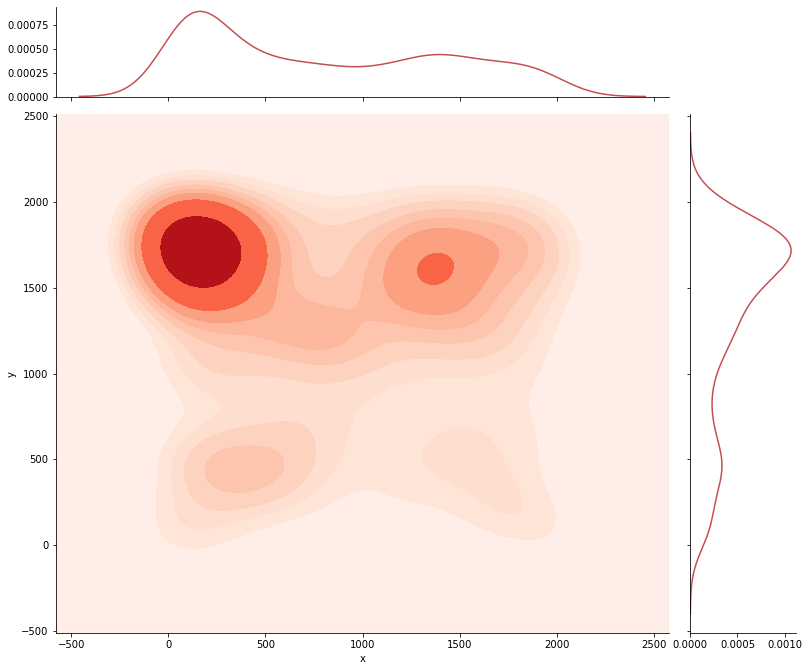

In [17]:
df = df[::5000] # This plot takes an extremely long time to generate, and for the sake of time, I had to shrink the dataframe
coordGraph = sns.jointplot(data=df, x='x', y='y', cmap="Reds", kind="kde",
                    marginal_kws={"color":"r", "alpha":1}, shade=True, thresh=0, alpha=1, marginal_ticks=True)
coordGraph.fig.set_figwidth(12)
coordGraph.fig.set_figheight(10)
# plt.title('Density of Coordinates', fontsize=20) # Title never showed up in the right spot
plt.show()

This final plot shows the density of where pixels were placed. I wasn't able to find a way to show each pixel individually without barely anything showing. There is a massive spike around (250, 1750). This is most likely due to this chunk of data taking place right after the canvas expanded from (2000, 1000) to (2000, 2000), so users were anxious to try to get a spot on the new section of canvas.

Overall, I believe that with more time and computing power, and more complicated graphs, great visuals could (and already is) made, such as timelapses, better heatmaps, and a list of who placed pixels where with unhashed usernames.